## Localized Classmap Example MNIST

In [1]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [2]:
# source localized classmap
exec(open('localized_classmap.py').read())

### MNIST Load + Preprocessing

In [3]:
# load and preprocess images
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

# load data
data_path = "data/" #TODO: add path to MNIST dataset. If possible, download MNIST dataset from https://pjreddie.com/projects/mnist-in-csv/ and move 
# to data/ folder

train_data = np.loadtxt(data_path + "mnist_train.csv",delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv",delimiter=",")

train_imgs = np.asarray(train_data[:, 1:])
test_imgs = np.asarray(test_data[:, 1:])

train_labels = np.asarray(train_data[:, :1])
test_labels = np.asarray(test_data[:, :1])


In [4]:
# reshape the labels
train_labels = train_labels.reshape(-1)
test_labels = test_labels.reshape(-1)

# make labels int
train_labels = train_labels.astype(int)
test_labels = test_labels.astype(int)

# flatten the images
train_data = train_imgs.reshape((len(train_imgs), -1))
test_data = test_imgs.reshape(len(test_imgs), -1)

### MLP Classifier

In [5]:
# Create a classifier: MLP
clf = MLPClassifier(random_state=42, max_iter=150)

# train the classifier
clf.fit(train_data, train_labels)


MLPClassifier(max_iter=150, random_state=42)

In [6]:
# make predictions
predicted = clf.predict(X=test_data)

Confusion matrix:
[[ 971    0    0    0    0    1    3    0    3    2]
 [   0 1119    2    2    1    1    2    2    6    0]
 [   4    4  966   14    3    1    2   18   17    3]
 [   1    1    3  979    0    7    0    4    4   11]
 [   1    2    3    0  945    0    4    6    1   20]
 [   1    1    0   16    0  842   15    3    9    5]
 [   2    4    0    0    5    5  939    0    3    0]
 [   2    1    6    1    3    1    0  997    3   14]
 [   1    2    4   18    2   10    4   10  913   10]
 [   0    3    0    6   11    3    2    9    1  974]]


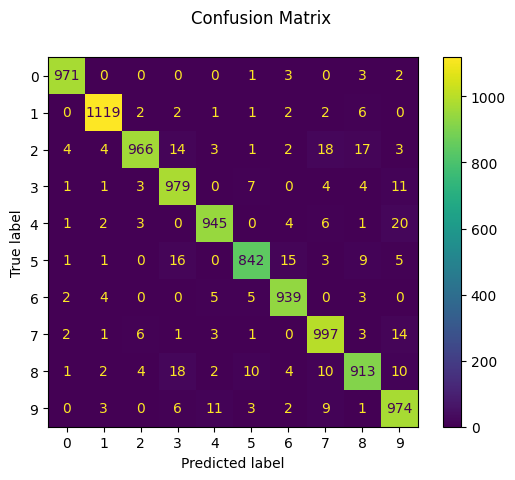

0.9645


In [7]:
# evaluate the accuracy
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_labels, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()
plt.close()

acc = metrics.accuracy_score(y_true=test_labels, y_pred=predicted)
print(acc) # 0.9611


### Localized Classmaps for two classes

Searching for 40 nearest neighbors for 10000 points. This could take some time!
Nearest neighbor search complete !


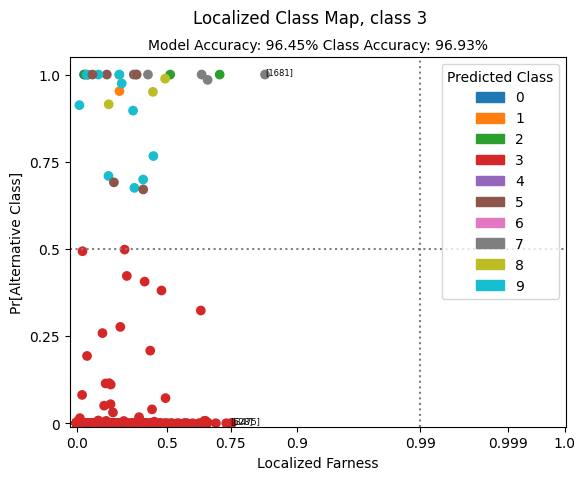

In [8]:
# plot explanations
# we can plot a localized class map for each class
# because it is quite slow to perform a nearest neighbor search
# for 10,000 points, we only look at class 3 and class 9

# class 3
plotExplanations(model=clf,
                 X=test_imgs,
                 y=test_labels,
                 k=40,
                 cl=3,
                 annotate=True)


Searching for 40 nearest neighbors for 10000 points. This could take some time!
Nearest neighbor search complete !


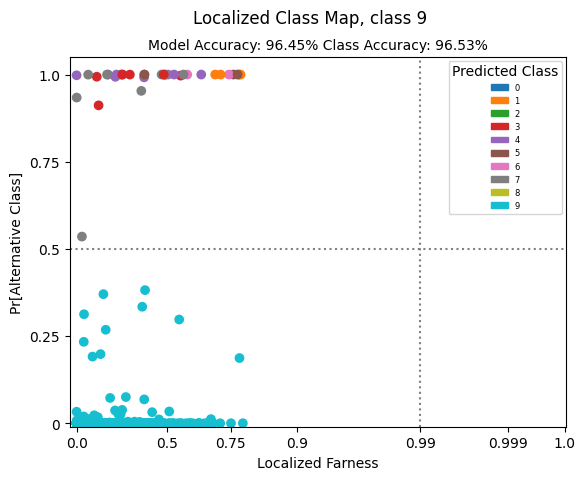

In [9]:
# class 9
plotExplanations(model=clf,
                 X=test_imgs,
                 y=test_labels,
                 k=40,
                 cl=9,
                 annotate=False)

### Further Exploration of a single class
We can take a look at which examples are typical of the class and which examples have a high LF

In [10]:
# compute LF
LF = compLocalFarness(X=test_imgs,y=test_labels,k=40)

# boolean: in class 9
in_class_9 = test_labels==9

# select the high LF examples in class 9
high_LF = np.array(range(len(LF)))[in_class_9 & (LF > 0.75)]

# select some typical examples in class 9: with low LF
low_LF = np.array(range(len(LF)))[in_class_9 & (LF == 0)]


Searching for 40 nearest neighbors for 10000 points. This could take some time!
Nearest neighbor search complete !


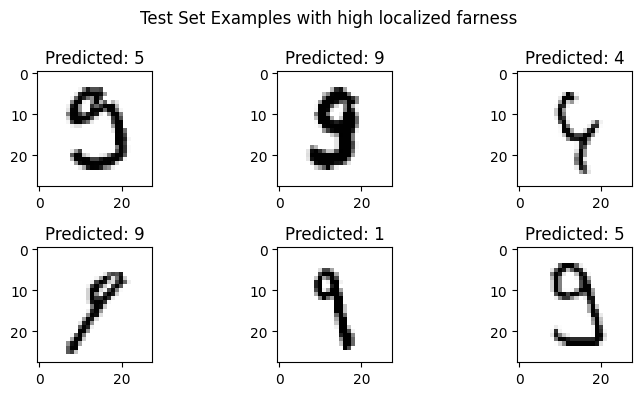

In [11]:
# plot images with high LF
num_row = 2
num_col = 3

# plot images: atypical examples of class 9
fig, axes = plt.subplots(num_row, num_col,
                         figsize=(2.5*num_col,2*num_row))
for i in range(6):
    ax = axes[i//num_col, i%num_col]
    img = test_imgs[high_LF[i]].reshape((28,28))
    ax.imshow(img, cmap='Greys')
    ax.set_title('Predicted: {}'.format(predicted[high_LF[i]]))
fig.suptitle('Test Set Examples with high localized farness')
plt.tight_layout()
plt.show()

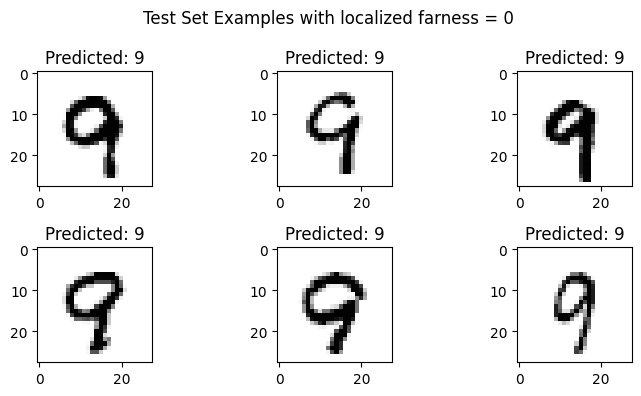

In [12]:
# plot images: typical examples of class 9
fig, axes = plt.subplots(num_row, num_col,
                         figsize=(2.5*num_col,2*num_row))
for i in range(6):
    ax = axes[i//num_col, i%num_col]
    img = test_imgs[low_LF[i]].reshape((28,28))
    ax.imshow(img, cmap='Greys')
    ax.set_title('Predicted: {}'.format(predicted[low_LF[i]]))
fig.suptitle('Test Set Examples with localized farness = 0')
plt.tight_layout()
plt.show()

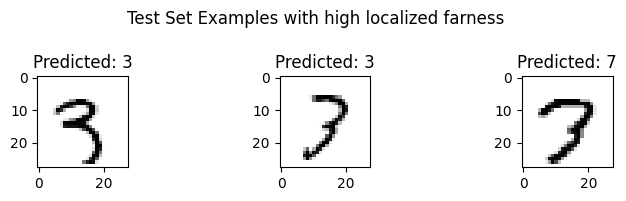

In [13]:

# for class 3: plot examples with high LF
# plot images: typical examples of class 9
examples_cl_3 = [628, 3475, 1681]
fig, axes = plt.subplots(1, 3,
                         figsize=(2.5*3,2*1))
for i in range(3):
    ax = axes[i//1]
    img = test_imgs[examples_cl_3[i]].reshape((28,28))
    ax.imshow(img, cmap='Greys')
    ax.set_title('Predicted: {}'.format(predicted[examples_cl_3[i]]))
fig.suptitle('Test Set Examples with high localized farness')
plt.tight_layout()
plt.show()

### Generate Examples

In [14]:
def generate_examples(test_labels, class_label=2):
    in_class = test_labels==class_label
    high_LF = np.array(range(len(LF)))[in_class & (LF > 0.75)]
    low_LF = np.array(range(len(LF)))[in_class & (LF == 0)]
    return(high_LF, low_LF)

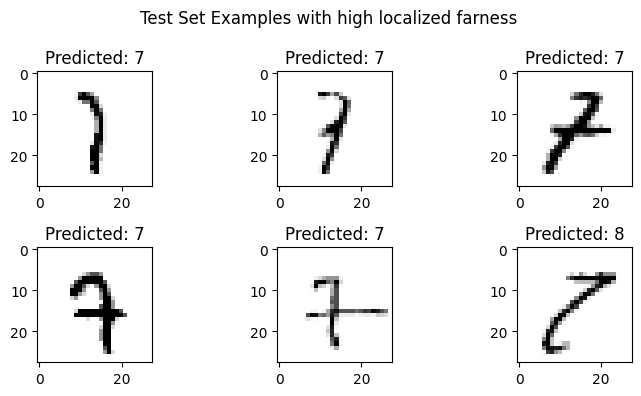

In [15]:
# plot images with high LF
high_LF = generate_examples(test_labels, class_label=7)[0]

num_row = max(len(high_LF)//3, 1)
num_col = 3

# plot images: atypical examples of class 9
fig, axes = plt.subplots(num_row, num_col,
                         figsize=(2.5*num_col,2*num_row))
for i in range(num_row*num_col):
    if num_row > 1:
        ax = axes[i//num_col, i%num_col]
    else:
        ax = axes[i]
    img = test_imgs[high_LF[i]].reshape((28,28))
    ax.imshow(img, cmap='Greys')
    ax.set_title('Predicted: {}'.format(predicted[high_LF[i]]))
fig.suptitle('Test Set Examples with high localized farness')
plt.tight_layout()
plt.show()